In [ ]:
pip install yolov5

In [ ]:
pip install detect

In [ ]:
pip install transformers

In [ ]:
pip install pipeline

In [ ]:
import torch
import numpy as np
import cv2
import urllib.request
import os


In [ ]:
from yolov5 import detect
from transformers import pipeline

In [ ]:
if not os.path.exists('yolov5s.pt'):
    url = 'https://github.com/ultralytics/yolov5/releases/download/v5.0/yolov5s.pt'
    urllib.request.urlretrieve(url, 'yolov5s.pt')

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5s.pt')


In [ ]:
translator = pipeline("translation_en_to_de")
#translator = pipeline("translation_en_to_fr")

In [ ]:
img = cv2.imread("/content/trfaff.png")

In [ ]:
results = model(img)

image 1/1: 309x550 3 persons, 9 cars, 2 buss, 1 truck, 2 traffic lights
Speed: 9.6ms pre-process, 2391.6ms inference, 23.1ms NMS per image at shape (1, 3, 384, 640)


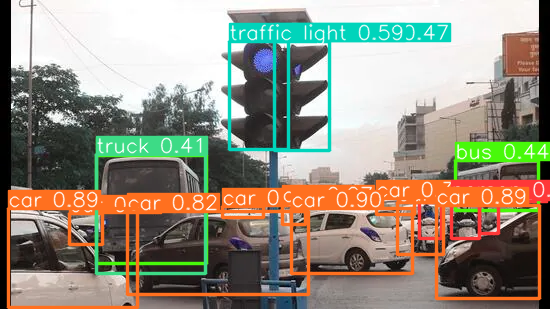

In [ ]:
results.print()
results.show()


In [ ]:
objects = []
for r in results.xyxy[0]:
    label = model.names[int(r[-1])]
    confidence = float(r[-2])
    if confidence > 0.5:
        objects.append((label, confidence, r[:-2]))

In [ ]:
labels = [o[0] for o in objects]
translations = translator(labels, max_length=128)

In [ ]:
for i, o in enumerate(objects):
    label = translations[i]['translation_text']
    print(f"{label}: {o[1]*100:.2f}% confidence")
    cv2.rectangle(img, (int(o[2][0]), int(o[2][1])), (int(o[2][2]), int(o[2][3])), (255, 0, 0), 2)
    cv2.putText(img, label, (int(o[2][0]), int(o[2][1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)


Auto: 89.90% confidence
Auto: 88.93% confidence
Auto: 88.77% confidence
Auto: 81.95% confidence
Ampeln: 58.77% confidence
Person: 51.01% confidence


In [ ]:
from google.colab.patches import cv2_imshow

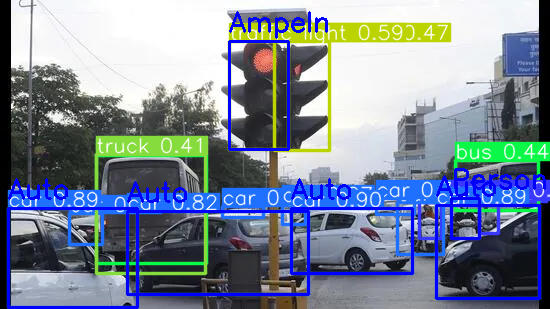

-1

In [ ]:
output=cv2_imshow(img)
output
cv2.waitKey(0)